# Машинное обучение

## Описание проекта

Подготовка прототипа модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Обращаемся к библиотекам *pandas*, *matplotlib* и *sklearn.*

## Описание данных
**Технологический процесс** 
 * Rougher feed — исходное сырье
 * Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    - Xanthate — ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
 * Rougher process (англ. «грубый процесс») — флотация
 * Rougher tails — отвальные хвосты
 * Float banks — флотационная установка
 * Cleaner process — очистка
 * Rougher Au — черновой концентрат золота
 * Final Au — финальный концентрат золота

**Параметры этапов**
 * air amount — объём воздуха
 * fluid levels — уровень жидкости
 * feed size — размер гранул сырья
 * feed rate — скорость подачи
 
## Наименование признаков

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:

 * rougher — флотация
 * primary_cleaner — первичная очистка
 * secondary_cleaner — вторичная очистка
 * final — финальные характеристики

Возможные значения для блока [тип_параметра]:

 * input — параметры сырья
 * output — параметры продукта
state — параметры, характеризующие текущее состояние этапа
calculation — расчётные характеристики


# 1. Подготовка данных

In [9]:
import pandas as pd


In [10]:
# Открытие датафрейм обучения
path = r"C:\Users\Asus\yandex-praktikum\08 Сборный проект 2"
df_train = pd.read_csv(path + '/gold_recovery_df_train.csv')

df_train.name = 'df_train'

df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [11]:
# Открытие датасета тестирования

df_test = pd.read_csv(path + '/gold_recovery_df_test.csv')

df_test.name = 'df_test'

df_test.info()

df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [12]:

#Откриытие датасета 
df = pd.read_csv(path +'/gold_recovery_df.csv')

df.name = 'df'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [13]:
#Выводим датасета с пустыми значениями

df_train[df_train.isna().any(axis = 1)].head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
47,2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
48,2016-01-17 00:00:00,5.296830,10.597469,NaN,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,...,14.006476,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603
49,2016-01-17 01:00:00,7.256114,9.017677,NaN,43.389252,NaN,12.100582,1.758360,4.606019,3.202483,...,14.032364,-549.326033,11.987133,-549.583570,10.094584,-492.041563,8.054770,-498.802262,11.961330,-597.272218
50,2016-01-17 02:00:00,8.162896,8.877528,NaN,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,...,13.984906,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929
53,2016-01-17 05:00:00,5.919503,11.078044,6.215769,42.922611,71.308281,10.866006,1.577753,17.550397,2.476280,...,13.972224,-548.238797,12.042964,-550.430774,9.989624,-499.606754,7.950446,-500.352648,12.011728,-599.043399
67,2016-01-17 19:00:00,5.976553,10.996561,NaN,43.523390,62.514075,11.439665,1.255373,9.235768,2.770570,...,14.000420,-550.369289,11.993860,-550.801872,10.019677,-502.134984,8.028135,-500.026321,11.999417,-601.306527
68,2016-01-17 20:00:00,5.849873,10.630010,NaN,43.582899,61.819261,11.415898,1.373004,9.696283,2.816412,...,14.017045,-549.905281,12.002873,-550.416734,9.960796,-497.271602,8.028384,-499.558407,11.978157,-598.788524
69,2016-01-17 21:00:00,5.608075,10.683667,NaN,44.966499,63.767242,11.462566,1.413849,10.764420,2.755172,...,14.038568,-549.818311,11.972607,-550.311739,10.074953,-500.657987,7.974807,-500.155945,11.985006,-600.107206
74,2016-01-18 02:00:00,4.537821,11.108789,4.964392,44.631736,72.825821,10.188482,1.410536,20.955075,2.238369,...,14.064474,-551.573603,11.974107,-550.699412,10.028196,-500.331171,8.072443,-499.359611,11.973959,-600.580952
98,2016-01-19 02:00:00,2.660271,6.020833,2.339234,27.097386,58.017871,5.640190,0.865842,7.574660,1.505868,...,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547


In [14]:
import  numpy as np

#C — доля золота в концентрате после флотации/очистки;
#F — доля золота в сырье/концентрате до флотации/очистки;
#T — доля золота в отвальных хвостах после флотации/очистки.

# recovery = (C*(F-T)) / (F*(C-T)) * 100

def calculate_recovery(c, f, t):
    recovery = ((c*(f-t)) / (f*(c-t)))*100
    #recovery = recovery.fillna(0.0)
    #recovery = recovery.replace([np.inf, -np.inf], 0.0)
    return recovery
    



In [15]:
# Формирование датасета без Nan значений и нулб значений 

train_drop = df_train.dropna().copy()
train_cut = train_drop.loc[(train_drop!=0).any(axis=1)]

len(train_cut)



11017

In [16]:
test_drop = df_test.dropna().copy()
test_cut = test_drop.loc[(test_drop!=0).any(axis=1)]

len(test_cut)

5383

In [17]:
# Вычисление recovery

recovery_calculated  = calculate_recovery(train_cut['rougher.output.concentrate_au'],
                                                                   train_cut['rougher.input.feed_au'],
                                                                   train_cut['rougher.output.tail_au'])

recovery_calculated 


0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 11017, dtype: float64

In [18]:
# Удаляем NaN значений и нуль 
x = df_train.dropna()

x_comparation = x.loc[(x!=0).any(axis=1)]

x_comparation['rougher.output.recovery']



0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 11017, dtype: float64

In [19]:
# Опрелеояем переменя 
y = recovery_calculated 




In [20]:
from sklearn.metrics import mean_absolute_error
# MAE между вычисленями значениями и получеными

mean_absolute_error(x_comparation['rougher.output.recovery'], y)

9.739730529255835e-15

### Вывод

Значения между вычислением и измерением recovery приюлижается к 0. Из этого исследует что измерений достоверные и соответсвуют теорий.

## 1.3. Анализ  признаки, недоступные в тестовой выборке. 

In [21]:
# выводим разницу между количества столбцами

df_train_columns = df_train.columns
df_test_columns = df_test.columns


print(len(df_train_columns), len(df_test_columns))

87 53


In [22]:
# Массив стольбцов которые не совпадают
different_columns = df_train_columns[~df_train_columns.isin( df_test_columns)]

different_columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

In [23]:
# Масив стольбцов которые совпадают
similar_columns = df_train_columns[df_train_columns.isin(df_test_columns)]

similar_columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

### Вывод

В тестовой выборке исключены параметры состояния технологического процесса. 

### 1.4. Предобработку данных.

In [24]:
# Проверка состояния NaN датасетов
for data in df_train, df_test, df:
    nan_sum = (data.isna().sum())
    total_nan = pd.Series(nan_sum).sum()
    print( data.name, ':' ,  total_nan)

df_train : 30320
df_test : 2360
df : 36587


In [25]:
#Поиск дупликатов датасетов
for data in df_train, df_test,df:
    duplicates = data.duplicated().sum()
    print( data.name, ':' , duplicates)

df_train : 0
df_test : 0
df : 0


In [26]:
# Определение функций заполнения NAn строк
def fill_nan(data):
    data = data.fillna(method = 'ffill')
    return data

In [27]:
# Применияем функций для каждого датасета
df_train_clean = fill_nan(df_train)

df_test_clean = fill_nan(df_test)

df_clean= fill_nan(df)

In [28]:
# Назначение имя стольбцов 

df_train_clean.name = 'df_train_clean'
df_test_clean.name = 'df_test_clean'
df_clean.name = 'df_clean'

# Проверка наличия Nan значений в датасета
for data in df_train_clean, df_test_clean, df_clean:
    nan_count = data.isna().sum()
    total_nan_count = pd.Series(nan_count).sum()
    print(  data.name,  'nan count:' ,  total_nan_count)

df_train_clean nan count: 0
df_test_clean nan count: 0
df_clean nan count: 0


In [29]:
# Размер датасета обучения
df_train_clean.shape

(16860, 87)

In [30]:
# Размер датасета тестирования
df_test_clean.shape

(5856, 53)

In [95]:
# Размер исходного датасета
df_clean.shape

(22716, 87)

# 2. Анализ данных

### Анализ концентраций металлов (Au, Ag, Pb) на различных этапах очистки. 

In [32]:
 import matplotlib.pyplot as plt

# Построение распределения концентраций Ag 

fig, ax = plt.subplots()
df_clean['rougher.output.concentrate_ag'].plot(kind ='kde', figsize = (15,5), linewidth = 2)
#df['rougher.output.tail_ag'].plot(kind ='kde')
df_clean['primary_cleaner.output.concentrate_ag'].plot(kind ='kde', linewidth = 2)
#df['primary_cleaner.output.tail_ag'].plot(kind ='kde') 
#df['secondary_cleaner.output.tail_ag'].plot(kind ='kde')
df_clean['final.output.concentrate_ag'].plot(kind ='kde', linewidth = 2)
#df['final.output.tail_ag'].plot(kind ='kde')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-3,20)
plt.show()
plt.show()



<Figure size 1500x500 with 1 Axes>

### Вывод

Концентрация Ag на каждом этапе технологического процесса уменьшается. Значение дисперсий уменьшается на каждом этапе технологического процесса. Наблюдается аномальные значения около нуля, которые могут быть связаны с не дополучения данных от приборов или остановка произвоства. 

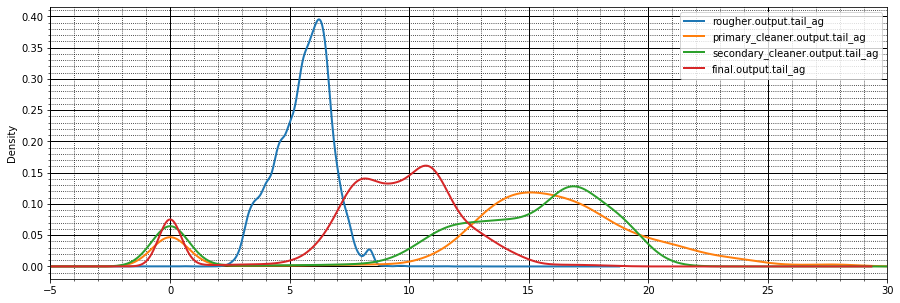

In [33]:
#  Построение распределения концентраций 

fig, ax = plt.subplots()
df_clean['rougher.output.tail_ag'].plot(kind ='kde', figsize= (15,5), linewidth = 2)
df_clean['primary_cleaner.output.tail_ag'].plot(kind ='kde', linewidth = 2) 
df_clean['secondary_cleaner.output.tail_ag'].plot(kind ='kde', linewidth = 2)
df_clean['final.output.tail_ag'].plot(kind ='kde', linewidth = 2)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-5,30)
plt.show()
plt.show()


### Вывод

Концентрация отвала Ag  на каждом этапе технологического процесса увеличивается. Значение дисперсий увеличивается  на каждом этапе технологического процесса. Наблюдается аномальные значения около нуля, значения около нуля, которые могут быть связаны с не дополучения данных от приборов или осатновка произвоства.

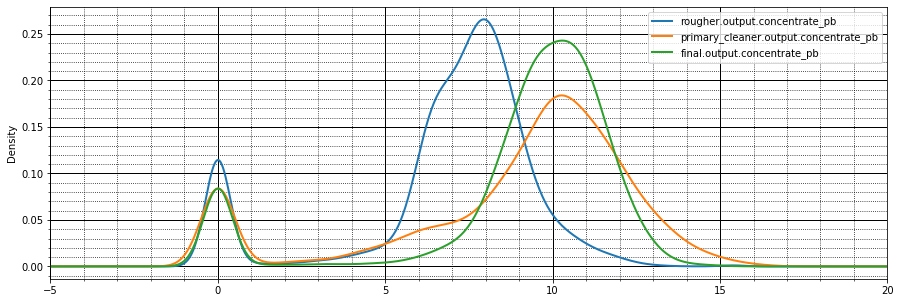

In [34]:
# Построение распределение концентраци Pb

fig, ax = plt.subplots()
df_clean['rougher.output.concentrate_pb'].plot(kind ='kde', figsize = (15,5), linewidth = 2)
#df['rougher.output.tail_pb'].plot(kind ='kde')
df_clean['primary_cleaner.output.concentrate_pb'].plot(kind ='kde' , linewidth = 2)
#df['primary_cleaner.output.tail_pb'].plot(kind ='kde') 
#df['secondary_cleaner.output.tail_pb'].plot(kind ='kde')
df_clean['final.output.concentrate_pb'].plot(kind ='kde'  , linewidth = 2)
#df['final.output.tail_pb'].plot(kind ='kde')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-5,20)
plt.show()


### Вывод

Концентрация Pb на каждом этапе технологического процесса уменьшается. Значение дисперсий уменьшается на каждом этапе технологического процесса. Наблюдается аномальные значения около нуля,  которые могут быть связаны с не дополучения данных от приборов или остновка производства.

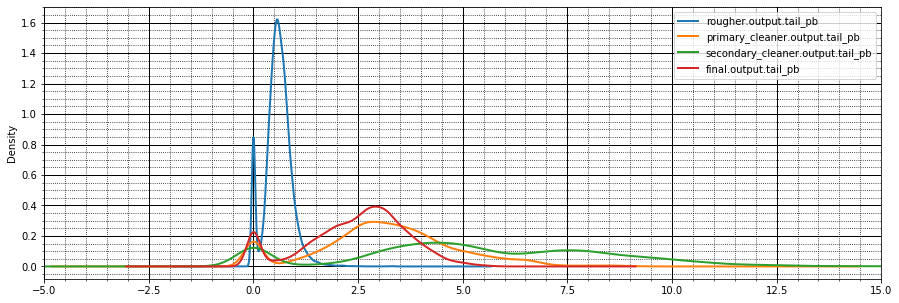

In [35]:
# Построение распределение отвала концентраций Pb

fig, ax = plt.subplots()
df_clean['rougher.output.tail_pb'].plot(kind ='kde', figsize= (15,5) , linewidth = 2)
df_clean['primary_cleaner.output.tail_pb'].plot(kind ='kde', linewidth = 2) 
df_clean['secondary_cleaner.output.tail_pb'].plot(kind ='kde', linewidth = 2)
df_clean['final.output.tail_pb'].plot(kind ='kde', linewidth = 2)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-5,15)
plt.show()

### Вывод

Концентрация Pb на каждом этапе технологического процесса увеличивается. Значение дисперсий увеличивается на каждом этапе технологического процесса. Наблюдается аномальные значения около нуля,  которые могут быть связаны с не дополучения данных от приборов или остновка производства. Этот процесс свидетильствует о рассеяния концентраций Pb.

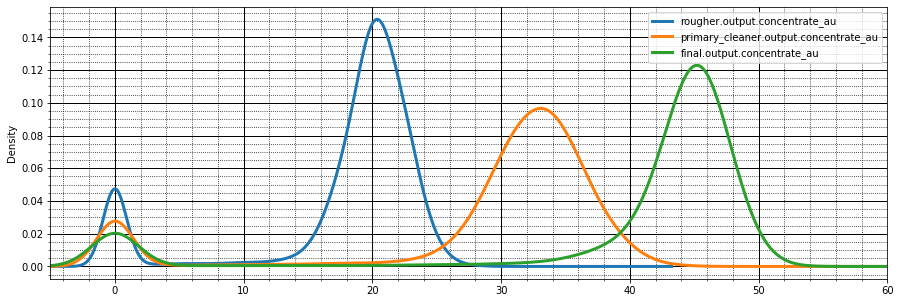

In [36]:
fig, ax = plt.subplots()
df_clean['rougher.output.concentrate_au'].plot(kind ='kde', figsize = (15,5) , linewidth = 3)
#df['rougher.output.tail_au'].plot(kind ='kde')
df_clean['primary_cleaner.output.concentrate_au'].plot(kind ='kde', linewidth = 3)
#df['primary_cleaner.output.tail_au'].plot(kind ='kde') 
#df['secondary_cleaner.output.tail_au'].plot(kind ='kde')
df_clean['final.output.concentrate_au'].plot(kind ='kde' , linewidth = 3)
#df['final.output.tail_au'].plot(kind ='kde')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()

plt.xlim(-5,60)

plt.show()

### Вывод

Концентрация Au на каждом этапе технологического процесса увеличивается. Значение дисперсий увеличивается на каждом этапе технологического процесса. Наблюдается аномальные значения около нуля,  которые могут быть связаны с не дополучения данных от приборов или остановка производства. Этот процесс свидетильствует о извлечения  концентраций Au.

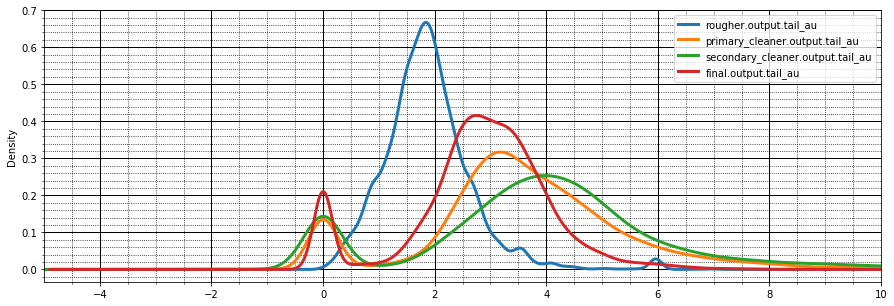

In [37]:
fig, ax = plt.subplots()
df_clean['rougher.output.tail_au'].plot(kind ='kde', figsize= (15,5), linewidth = 3)
df_clean['primary_cleaner.output.tail_au'].plot(kind ='kde', figsize = (15,5), linewidth = 3) 
df_clean['secondary_cleaner.output.tail_au'].plot(kind ='kde', linewidth = 3)
df_clean['final.output.tail_au'].plot(kind ='kde' , linewidth = 3)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-5,10)
plt.show()

### Вывод

Концентрация Au отвала на каждом этапе технологического процесса увеличивается. Значение дисперсий увеличивается на каждом этапе технологического процесса. Наблюдается аномальные значения около нуля,  которые могут быть связаны с не дополучения данных от приборов или остановка производства. Этот процесс свидетильствует о извлечения  концентраций Au.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. 

In [38]:
# Определение осей значения размера гранула

x = df_train_clean['rougher.input.feed_size'].copy()
y = df_test_clean['rougher.input.feed_size'].copy()


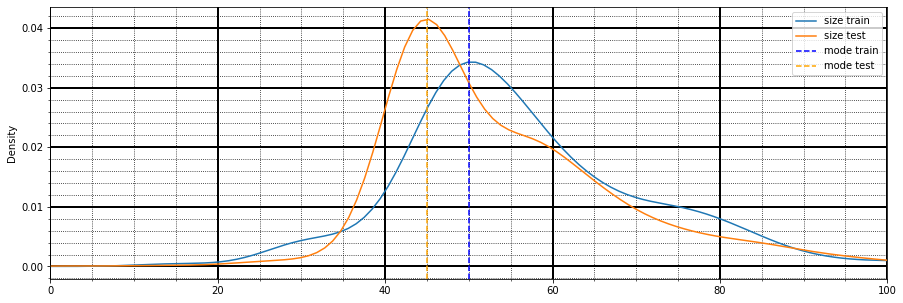

In [39]:
fig, ax = plt.subplots()

x.plot(kind = 'kde', figsize = (15,5), label = 'size train')
y = df_test_clean['rougher.input.feed_size']
y.plot(kind = 'kde', label = 'size test')
#p.plot(kind = 'kde', figsize = (15,5), label = 'size train clean')
#q.plot(kind = 'kde', figsize = (15,5), label = 'size train clean')

ax.axvline(50, color="blue", linestyle="--", label = 'mode train')
ax.axvline(45, color="orange", linestyle="--", label = 'mode test')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(0,100)

plt.show()

### Вывод

Значение размера гранула в выборке обучения и тестирования отличается на 5 значений. Значение дисперсий увеличивается.

### Исследование суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [40]:
# Сумма концентраций всех веществ в сырье.
raw_concentrate = ( df_clean['rougher.input.feed_ag'] + df_clean['rougher.input.feed_pb'] + df_clean['rougher.input.feed_sol']
                 + df_clean['rougher.input.feed_au'])

# Сумма концентраций всех веществ в черновом.
rougher_concentrate = ( df_clean['rougher.output.concentrate_ag'] + df_clean['rougher.output.concentrate_pb']  
                    +df_clean['rougher.output.concentrate_sol'] + df_clean['rougher.output.concentrate_au'] )

# Сумма концентраций отвала  всех веществ в черновом.
rougher_tail= (df_clean['rougher.output.tail_ag'] + df_clean['rougher.output.tail_pb'] + 
       +df_clean['rougher.output.tail_sol'] + df_clean['rougher.output.tail_au'])

# Сумма концентраций всех веществ в финальном концентраций.
final_concentrate = (df_clean['final.output.concentrate_ag'] + df_clean['final.output.concentrate_pb'] + 
                   df_clean['final.output.concentrate_sol']  + df_clean[ 'final.output.concentrate_au'])

# Сумма концентраций отвала всех веществ в финальном концентраций.
final_tail = ( df_clean['final.output.tail_ag'] + df_clean['final.output.tail_pb'] +
                  df_clean['final.output.tail_sol'] + df_clean['final.output.tail_au'] )


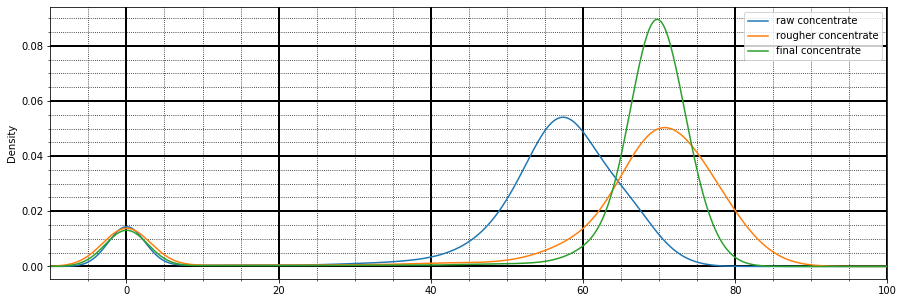

In [41]:
#График концентраций веществ на разных стадях

fig, ax = plt.subplots()

raw_concentrate.plot(kind = 'kde', figsize = (15,5), label = 'raw concentrate')
rougher_concentrate.plot(kind = 'kde', label = 'rougher concentrate')
final_concentrate.plot(kind = 'kde', label = 'final concentrate')
#ax.axvline(50, color="blue", linestyle="--", label = 'mode train')
#ax.axvline(45, color="orange", linestyle="--", label = 'mode test')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-10,100)

plt.show()

### Вывод

Значение концентраций веществ на начальном этапе меньше чем после флотаций и в финальном концентраций . В финальном этапе распределение стремится к нормальному, что свиделтсвует о работе технологического процесса. Наблюдается аномалные значения около нуля.

In [42]:
# Данные без аномальных значентй.
raw_concentrate_normalize = raw_concentrate[raw_concentrate > 1]

rougher_concentrate_normalize = rougher_concentrate[rougher_concentrate > 1]

final_concentrate_normalize = final_concentrate[final_concentrate > 1]


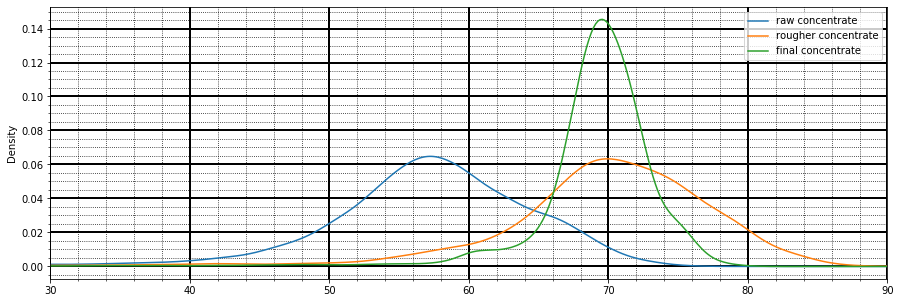

In [43]:
# Построение графика без аномальных значений

fig, ax = plt.subplots()

raw_concentrate_normalize.plot(kind = 'kde', figsize = (15,5), label = 'raw concentrate')
rougher_concentrate_normalize.plot(kind = 'kde', label = 'rougher concentrate')
final_concentrate_normalize.plot(kind = 'kde', label = 'final concentrate')
#ax.axvline(50, color="blue", linestyle="--", label = 'mode train')
#ax.axvline(45, color="orange", linestyle="--", label = 'mode test')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(30,90)

plt.show()

### Вывод

Значение концентраций веществ без аномальных значений  на начальном этапе меньше чем после флотаций и в финальном концентраций . В финальном этапе распределение стремится к нормальному, что свиделтсвует о работе технологического процесса. На финальном этапе значений концентраций приближается около даного значения

# 3. Модель

In [44]:
# Определение функций SMAPE
def smape(target, prediction, multioutput='uniform_average'):
    smape = 100/len(target) * np.sum(2* np.abs(prediction - target) / (np.abs(target) + np.abs(prediction)))
    return smape

# Определение функцийт итогово SMAPE        
def total_sMape(rougher, final):
    total_sMape = 0.25*rougher + 0.75*final
    return total_sMape



### Обучение  разных модели и оценка  их качество кросс-валидацией. Выбор лучшую модель и проверка  на тестовой выборке. 

In [45]:
# Импорт библотек.
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import make_scorer


In [46]:
# Разделение дата на новыые стольбцы
df_train_clean['year'] = pd.DatetimeIndex(df_train_clean['date']).year # год
df_train_clean['month'] = pd.DatetimeIndex(df_train_clean['date']).month # месяц
df_train_clean['day'] = pd.DatetimeIndex(df_train_clean['date']).day # дни
df_train_clean['hour'] = pd.DatetimeIndex(df_train_clean['date']).hour # час
df_train_clean['minute'] = pd.DatetimeIndex(df_train_clean['date']).minute # минуты
df_train_clean['second'] = pd.DatetimeIndex(df_train_clean['date']).second # секунды

# Удаление столбца дата
df_train_clean = df_train_clean.drop('date', axis =1)
df_train_clean.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,year,month,day,hour,minute,second
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,8.079666,-500.470978,14.151341,-605.841980,2016,1,15,0,0,0
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,7.984757,-500.582168,13.998353,-599.787184,2016,1,15,1,0,0
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,8.013877,-500.517572,14.028663,-601.427363,2016,1,15,2,0,0
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,7.977324,-500.255908,14.005551,-599.996129,2016,1,15,3,0,0
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,7.894242,-500.356035,13.996647,-601.496691,2016,1,15,4,0,0


In [47]:
from sklearn.preprocessing import StandardScaler


# Стандаризация признаков

scaler = StandardScaler() 
scaler.fit(df_train_clean)
array_train_scaled = scaler.transform(df_train_clean)

# Определение датафрэйма признаков стандаризаций
df_train_scaled = pd.DataFrame(array_train_scaled, index=df_train_clean.index , 
                               columns=df_train_clean.columns )

df_train_scaled.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,year,month,day,hour,minute,second
0,0.642225,0.236002,-0.680429,0.203646,0.309962,0.460013,-1.174972,1.776762,-0.417549,0.122360,...,-0.678545,-0.002484,-0.591174,-1.047737,-1.235435,-1.577497,-0.081267,-1.660698,-2.462369,-2.462369
1,0.629898,0.259134,-0.744289,0.239801,0.214449,0.473851,-1.148905,1.714272,-0.353679,0.095225,...,-0.693721,-0.003803,-0.612826,-0.971164,-1.235435,-1.577497,-0.081267,-1.516235,-2.462369,-2.462369
2,0.642473,0.330619,-0.712051,0.236670,0.128320,0.485957,-1.127515,1.615675,-0.327939,0.061659,...,-0.689065,-0.003037,-0.608536,-0.991907,-1.235435,-1.577497,-0.081267,-1.371772,-2.462369,-2.462369
3,0.638709,0.261489,-0.846434,0.238963,0.145632,0.462960,-1.184488,1.690720,-0.414659,0.032912,...,-0.694910,0.000066,-0.611807,-0.973806,-1.235435,-1.577497,-0.081267,-1.227309,-2.462369,-2.462369
4,0.686353,0.309766,-0.825762,0.244946,0.039218,0.445919,-1.258551,1.689064,-0.486163,-0.046522,...,-0.708195,-0.001121,-0.613067,-0.992783,-1.235435,-1.577497,-0.081267,-1.082846,-2.462369,-2.462369


In [48]:

# Определение признаков маштабированы

features_train_scaled_1 = df_train_scaled.drop(different_columns, axis = 1)
target_train_scaled_1 = df_train_scaled['rougher.output.recovery']
target_train_scaled_2 = df_train_scaled['final.output.recovery']


features_train_scaled_1.head()



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,year,month,day,hour,minute,second
0,0.122360,0.502549,-0.076371,0.409011,0.080248,0.092836,0.077596,-0.109989,0.094574,0.109183,...,-0.678545,-0.002484,-0.591174,-1.047737,-1.235435,-1.577497,-0.081267,-1.660698,-2.462369,-2.462369
1,0.095225,0.542972,-0.076371,0.439605,0.148890,0.067373,0.141166,0.096259,0.159767,0.100983,...,-0.693721,-0.003803,-0.612826,-0.971164,-1.235435,-1.577497,-0.081267,-1.516235,-2.462369,-2.462369
2,0.061659,0.788470,-0.076371,0.414526,0.214927,0.078964,0.204529,0.087007,0.224683,0.081321,...,-0.689065,-0.003037,-0.608536,-0.991907,-1.235435,-1.577497,-0.081267,-1.371772,-2.462369,-2.462369
3,0.032912,0.789880,-0.076371,0.426569,0.210798,0.066775,0.205236,0.098614,0.220442,0.083117,...,-0.694910,0.000066,-0.611807,-0.973806,-1.235435,-1.577497,-0.081267,-1.227309,-2.462369,-2.462369
4,-0.046522,0.932234,-0.076371,0.455461,0.214364,0.092027,0.207254,0.090555,0.218639,0.081092,...,-0.708195,-0.001121,-0.613067,-0.992783,-1.235435,-1.577497,-0.081267,-1.082846,-2.462369,-2.462369


In [49]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Подбор параметров модели
smape_score = make_scorer(smape, greater_is_better= False )
# Матрица гиперпараметров

param_dist_dt = {"max_depth":range(1,101,10) ,
                "min_samples_leaf": [ 1, 0.5, 2],
                 }


# Кросс_валидация регрессии дерево решений и обучение на маштабированые признаки и с расширением признаком по дате 


dt_cv = GridSearchCV(DecisionTreeRegressor(random_state = 12345),param_dist_dt, cv = 4, scoring = smape_score )

dt_cv_scaled = dt_cv.fit(features_train_scaled_1, target_train_scaled_1)

print("Tuned decission tree parameters : {}".format(dt_cv_scaled.best_params_))
print("Best sMape DecisionTree regressor: {}".format(dt_cv_scaled.best_score_))




Tuned decission tree parameters : {'max_depth': 31, 'min_samples_leaf': 2}
Best sMape DecisionTree regressor: -127.69110381708217


In [50]:
# Обучение модели дерево регресси для признака  'rougher.output.recovery' с подрбраными параметрами 
dt_model =DecisionTreeRegressor(random_state = 12345, max_depth = 31, min_samples_leaf = 2 )

dt_fit_scaled = dt_model.fit(features_train_scaled_1, target_train_scaled_1)

dt_scores_scaled = cross_val_score(dt_fit_scaled, features_train_scaled_1, target_train_scaled_1, cv = 10,
                                   scoring = smape_score)

dt_smape_scaled = pd.Series(dt_scores_scaled)



print(dt_smape_scaled)


0   -138.677212
1   -148.199488
2   -121.822161
3    -87.009892
4   -136.175217
5   -142.417072
6   -151.121966
7    -81.426956
8    -80.805515
9    -87.496333
dtype: float64


In [51]:
# средное значение smape при кросс-валидаций
print("mean cross validation score decision tree regressor: {}".format(np.mean(dt_smape_scaled)))


mean cross validation score decision tree regressor: -117.51518122750024


In [52]:
# Определение признаков не маштабированы

features_train_nonscaled_1 = df_train_clean.drop(different_columns, axis = 1)
target_train_nonscaled_1 = df_train_clean['rougher.output.recovery']
target_train_nonscaled_2 = df_train_clean['final.output.recovery']


features_train_nonscaled_1.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,year,month,day,hour,minute,second
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,8.079666,-500.470978,14.151341,-605.841980,2016,1,15,0,0,0
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,7.984757,-500.582168,13.998353,-599.787184,2016,1,15,1,0,0
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,8.013877,-500.517572,14.028663,-601.427363,2016,1,15,2,0,0
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,7.977324,-500.255908,14.005551,-599.996129,2016,1,15,3,0,0
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,7.894242,-500.356035,13.996647,-601.496691,2016,1,15,4,0,0


In [53]:
# Кросс_валидация регрессии дерево решений 


dt_cv = GridSearchCV(DecisionTreeRegressor(random_state = 12345),param_dist_dt, cv = 4, scoring = smape_score )

dt_cv_nonscaled = dt_cv.fit(features_train_nonscaled_1, target_train_nonscaled_1)

print("Tuned decission tree parameters : {}".format(dt_cv_nonscaled.best_params_))
print("Best sMape DecisionTree regressor: {}".format(dt_cv_nonscaled.best_score_))


Tuned decission tree parameters : {'max_depth': 1, 'min_samples_leaf': 0.5}
Best sMape DecisionTree regressor: -17.967803962141453


In [54]:
# Обучение модели дерево регресси для признака  'rougher.output.recovery' с подрбраными параметрами 
dt_model =DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 0.5 )

dt_fit_nonscaled = dt_model.fit(features_train_nonscaled_1, target_train_nonscaled_1)

dt_scores_nonscaled = cross_val_score(dt_fit_nonscaled, features_train_nonscaled_1, target_train_nonscaled_1, cv = 10,
                                   scoring = smape_score)

dt_smape_nonscaled = pd.Series(dt_scores_nonscaled)


print(dt_smape_nonscaled)


0   -15.691275
1   -15.638335
2   -10.882927
3   -12.795192
4   -14.127254
5   -18.787993
6   -40.116604
7   -27.495140
8   -14.387626
9   -12.150053
dtype: float64


In [55]:
# средное значение smape при кросс-валидаций
print("mean cross validation score decision tree regressor: {}".format(np.mean(dt_smape_nonscaled)))


mean cross validation score decision tree regressor: -18.207239839685258


In [56]:
# Определение признаков не маштабированы

df_train_nodate = df_train_clean.drop(['year', 'month', 'day', 'hour', 'minute', 'second'], axis = 1)
features_train_1 = df_train_nodate.drop(different_columns, axis = 1)
target_train_1 = df_train_nodate['rougher.output.recovery']
target_train_2 = df_train_nodate['final.output.recovery']


features_train_1.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [57]:
# Кросс_валидация регрессии дерево решений 

dt_cv = GridSearchCV(DecisionTreeRegressor(random_state = 12345),param_dist_dt, cv = 4, scoring = smape_score )

dt_cv_nonscaled = dt_cv.fit(features_train_1, target_train_1)

print("Tuned decission tree parameters : {}".format(dt_cv_nonscaled.best_params_))
print("Best sMape DecisionTree regressor: {}".format(dt_cv_nonscaled.best_score_))

Tuned decission tree parameters : {'max_depth': 1, 'min_samples_leaf': 0.5}
Best sMape DecisionTree regressor: -17.967803962141453


In [58]:
# Обучение модели дерево регресси для признака  'rougher.output.recovery' с подрбраными параметрами 
dt_model =DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 0.5 )

dt_fit = dt_model.fit(features_train_1, target_train_1)

predict_dt = dt_model.predict(features_train_1)
dt_scores = cross_val_score(dt_fit, features_train_1, target_train_1, cv = 10,
                                   scoring = smape_score)

dt_smape = pd.Series(dt_scores)

print(dt_smape)
print(np.mean(dt_smape))

0   -15.691275
1   -15.638335
2   -10.882927
3   -12.795192
4   -14.127254
5   -18.787993
6   -40.116604
7   -27.495140
8   -14.387626
9   -12.150053
dtype: float64
-18.20723983968527


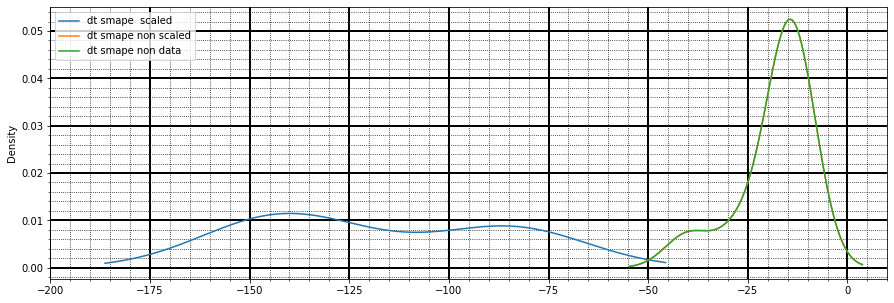

In [59]:
# Постпрение распределениа параметров smape в рещультате кросс-валидаций
fig, ax = plt.subplots()
dt_smape_scaled.plot(kind = 'kde', figsize = (15,5), label = 'dt smape  scaled', grid = True)
dt_smape_nonscaled.plot(kind = 'kde', figsize = (15,5), label = 'dt smape non scaled', grid = True)
dt_smape.plot(kind = 'kde', figsize = (15,5), label = 'dt smape non data', grid = True)

ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-200,10)

plt.show()

In [60]:
# Обучение модели дерево регресси для признака  'rougher.output.recovery' с подрбраными параметрами 
rf_model =DecisionTreeRegressor(random_state = 12345)

rf_fit = rf_model.fit(features_train_1, target_train_1)

rf_scores = cross_val_score(rf_fit, features_train_1, target_train_1, cv = 10,
                                   scoring = smape_score)

rf_smape = pd.Series(rf_scores)

print(rf_smape)
print(np.mean(rf_smape))

0   -34.985261
1   -45.987585
2   -33.486154
3   -11.315609
4   -26.773317
5   -32.654924
6   -53.059986
7   -36.730277
8   -11.215614
9   -15.759582
dtype: float64
-30.196831048987853


In [61]:
# Обучение модели линейной  регресси для признака  'rougher.output.recovery'
lr = LinearRegression()
lr_fit = lr.fit(features_train_1, target_train_1)
predict_lr = lr.predict(features_train_1)
lr_scores = cross_val_score(lr_fit, features_train_1, target_train_1, cv = 10,
                                   scoring = smape_score)

lr_smape = pd.Series(lr_scores)

print(lr_smape)
print(np.mean(lr_smape))


0   -16.035496
1   -16.336189
2   -12.378193
3   -10.332702
4   -13.940997
5   -23.940583
6   -38.171453
7   -23.409248
8   -10.414915
9   -18.154383
dtype: float64
-18.31141580219037


In [62]:
lr_fit_nonscaled = lr.fit(features_train_nonscaled_1, target_train_nonscaled_1)

lr_scores_nonscaled = cross_val_score(lr_fit_nonscaled, features_train_nonscaled_1, target_train_nonscaled_1, cv = 10,
                                   scoring = smape_score)

lr_smape_nonscaled = pd.Series(lr_scores_nonscaled)

print(lr_smape_nonscaled)
print(np.mean(lr_smape_nonscaled))

0   -13.319056
1   -16.969848
2   -12.917006
3   -21.782298
4   -14.256726
5   -25.803834
6   -37.608808
7   -26.995942
8   -10.004901
9   -10.416834
dtype: float64
-19.007525454409308


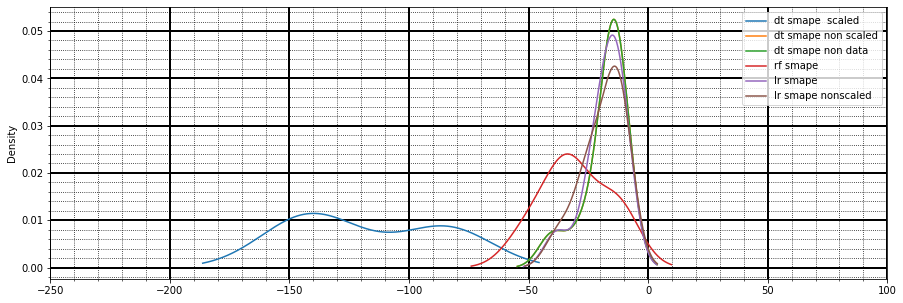

In [63]:
# Постпрение распределениа параметров smape в рещультате кросс-валидаций
fig, ax = plt.subplots()
dt_smape_scaled.plot(kind = 'kde', figsize = (15,5), label = 'dt smape  scaled', grid = True)
dt_smape_nonscaled.plot(kind = 'kde', figsize = (15,5), label = 'dt smape non scaled', grid = True)
dt_smape.plot(kind = 'kde', figsize = (15,5), label = 'dt smape non data', grid = True)
rf_smape.plot(kind = 'kde', figsize = (15,5), label = 'rf smape', grid = True)
lr_smape.plot(kind = 'kde', figsize = (15,5), label = 'lr smape', grid = True)
lr_smape_nonscaled.plot(kind = 'kde', figsize = (15,5), label = 'lr smape nonscaled', grid = True)



ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-250,100)

plt.show()

### Вывод

Исходя из графика распределения метрики SMAPE видно что распределение линейной регресии без признака о дате и не маштабированые признаки  стремится к нормальному распределению, в дальнейще для предсказания final.output.recovery используется данные модель.

In [64]:
features_train_1.shape

(16860, 52)

In [65]:
# Добавляем предаказание в датафрэйм для обучения модели и предсказание final.output.recovery модели дерева решений

df_dt = pd.DataFrame(predict_dt, index = features_train_1.index , columns = ['rougher.output.recovery_dt'])
    
df_dt.head()

,rougher.output.recovery_dt
0,75.465526
1,75.465526
2,75.465526
3,75.465526
4,75.465526


In [66]:
# Определение признака для обучения модели дерево решений и предсказание final.output.recovery

features_train_dt = features_train_1.join(df_dt)

features_train_dt.head()


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery_dt
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,75.465526
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,75.465526
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,75.465526
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,75.465526
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,75.465526


In [67]:
# Обучение модели дерево   решений  для признака  'final.output.recovery'
dt_2 = DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 0.5 )
dt_fit_2 = dt_2.fit(features_train_dt, target_train_2)

dt_scores_2 = cross_val_score(dt_2, features_train_dt, target_train_2, cv = 10, scoring = smape_score)


smape_dt_2 = pd.Series(dt_scores_2)
print(smape_dt_2, np.mean(smape_dt_2))


0   -12.230456
1   -13.803989
2   -11.482038
3    -9.555761
4   -10.339266
5   -15.761287
6   -22.771199
7   -13.449694
8   -15.029080
9   -16.275146
dtype: float64 -14.069791484623


In [68]:
# Добавляем предаказание в датафрэйм для обучения модели и предсказание final.output.recovery линейной регрессий

df_lr = pd.DataFrame(predict_lr, index = features_train_1.index , columns = ['rougher.output.recovery_lr'])
    
df_lr.head()

,rougher.output.recovery_lr
0,83.524298
1,82.214070
2,82.013177
3,81.976721
4,81.378788


In [69]:
# Определение признака для обучения модели линейной регресий  final.output.recovery

features_train_2 = features_train_1.join(df_lr)

features_train_2.head()


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery_lr
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,83.524298
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,82.214070
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,82.013177
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,81.976721
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,81.378788


In [70]:
# Обучение модели линейной  регресси для признака  'final.output.recovery'
lr_2 = LinearRegression( )
lr_fit_2 = lr_2.fit(features_train_2, target_train_2)

lr_scores_2 = cross_val_score(lr_2, features_train_2, target_train_2, cv = 10, scoring = smape_score)


smape_lr_2 = pd.Series(lr_scores_2)
print(smape_lr_2, np.mean(smape_lr_2))


0   -13.301222
1   -14.940716
2   -12.486383
3   -10.367239
4   -11.907652
5   -17.265095
6   -23.696195
7   -11.340801
8   -13.785700
9   -20.526504
dtype: float64 -14.961750697961387


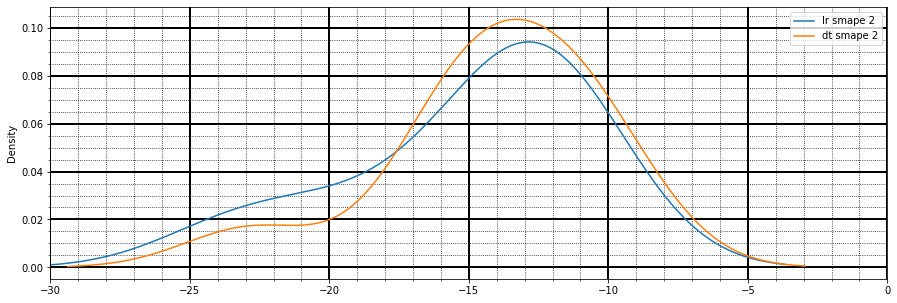

In [71]:
# Постпрение распределениа параметров smape в рещультате кросс-валидаций при предсказание final.output.recovery
fig, ax = plt.subplots()
smape_lr_2.plot(kind = 'kde', figsize = (15,5), label = 'lr smape 2', grid = True)
smape_dt_2.plot(kind = 'kde', figsize = (15,5), label = 'dt smape 2', grid = True)

ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-30,0)

plt.show()

### Вывод

По результатам кросс валидация найлучще модель получается при обучения модели датасетом без признаков о дате и без маштабирования. Дальше тестируем качество модели на датасет тест

In [72]:
# Востановление выборки тестирования из исходного датасета
df_test_date = df_test_clean['date']

df_date = df_clean['date']

df_test_from_df = df_clean[df_date.isin(df_test_date)]
df_test_from_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5521,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
5522,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
5523,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
5524,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
5525,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


## Проверка качество модели на тестовой датасет

In [73]:
df_test_clean.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [74]:
# Выделяем тестовые признаки из тетового датасета 
features_test = df_test_clean.drop('date', axis =1 )

#Обучение лучше модель по подобраным гиперпараметрам
dt_model =DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 0.5 )
dt_model.fit(features_train_1, target_train_1)

# Предсказание  rougher.output.recovery на тесте по лучше модели дерево решений 
predict_dt_test = pd.Series(dt_model.predict(features_test))
predict_dt_test.describe()

count    5856.000000
mean       83.125870
std         3.976759
min        75.465526
25%        85.189995
50%        85.189995
75%        85.189995
max        85.189995
dtype: float64

In [100]:
# Для того чтобы проверить качество модели восстановим таргет из общего датафрейма по признаку даты
df_test_date = df_test_clean['date']

df_date = df_clean['date']

df_test_from_df = df_clean[~df_date.isin(df_test_date)]
df_test_from_df.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [101]:
# Срез rouger.output.recovery  из общего датафрэйма. и назначение как тестовый таргет
target_test_1 = df_test_from_df['rougher.output.recovery']

target_test_1.describe()


count    16860.000000
mean        80.327761
std         18.612822
min          0.000000
25%         78.991703
50%         84.844438
75%         89.825076
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [105]:
# Вычисление SMAPE для rougher.output.recovert на тестовом датасета
smape_dt_test = smape(target_test_1 , predict_dt )

smape_dt_test

16.593635725080407

In [106]:
# Создание массива среднего значения таргета для прверки на адвеквадность результата
constant_prediction_dt = pd.Series([np.mean(target_train_1)]*len(target_test_1))

# Вычисление SMAPE на массив постоянного значения для rougher.output.recovery
smape_dt_cons = smape(target_test_1, constant_prediction_dt)

smape_dt_cons

8.735821381532592

In [112]:
# Назначение final.output.recovery из общего датасета который выделил по индексам даты тестового датасета 
target_test_2 = df_clean[df_date.isin(df_test_date)]['final.output.recovery']

target_test_2.describe()

count    5856.000000
mean       66.681907
std        12.115077
min         0.000000
25%        64.053165
50%        69.288619
75%        72.985420
max       100.000000
Name: final.output.recovery, dtype: float64

In [113]:
# Формирование датафрейма rougher.ouput.recovery для предсказания final.output.recovery
df_predict_test = pd.DataFrame(predict_dt_test, index = features_test.index , columns = ['rougher.output.recovery_dt'])
    
df_predict_test.head()
#Назначение признаки для предсказания final.output.recovery на основе предсказания модели rougher.output.recovery
features_test_2_dt = features_test.join(df_predict_test)

In [114]:
# Обучение модели с подобраными гиперпараметрами для предсказания final.output.recovery
dt_2 = DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 0.5 )
dt_2.fit(features_train_dt, target_train_2)

predict_test_dt_final = dt_2.predict(features_test_2_dt)

In [115]:
# Вычисление  SMAPE для final.output.recovery
final_smape_dt = smape(target_test_2, predict_test_dt_final)

final_smape_dt



11.787826397594346

In [116]:
# Расчет SMape для тестового датасета на модели регрессии дерево решений
total_smape_dt = total_sMape(smape_dt_test, final_smape_dt)

print( "SMAPE Decision tree regression: {}".format(total_smape_dt.round(2)), "%")

SMAPE Decision tree regression: 12.99 %


In [117]:
# Создание модель постоянного значения для проверки качество на адвеквадности 
constant_prediction_dt_final = pd.Series([np.mean(target_train_2)]*len(target_test_1))


smape_dt_cons_final = smape(target_test_1, constant_prediction_dt_final)

print( "SMAPE final.output.recovery average : {}".format(smape_dt_cons_final.round(2)), "%")

SMAPE final.output.recovery average : 17.38 %


In [118]:
# Расчет итогово SMAPE на постояное средное значения таргета.
total_smape_const = total_sMape(smape_dt_cons, smape_dt_cons)

print( "Total SMAPE average model, sanity test  : {}".format(total_smape_const.round(2)), "%")

Total SMAPE average model, sanity test  : 8.74 %


## Вывод 

При сравнения результата SMAPE модели регрессии дерево решении с моделью, которая выдает среднее значения, получилось что значения  SMAPEмодели дерево решении больше на 4.28%, что свидительсвует о адекватности модели </font>